In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from utils import (
    to_GeV_per_cubic_femtometre, 
    to_nucleons_per_cubic_femtometre, 
    nsat
)

from constraints import epsilon
from qcd_likelihood import pQCD

In [ ]:
muH = 2.6
X = 2

pQCDX = pQCD(X)
nH = pQCDX.number_density(muH)
pH = pQCDX.pressure(muH)
epsilonH = epsilon(muH, nH, pH)

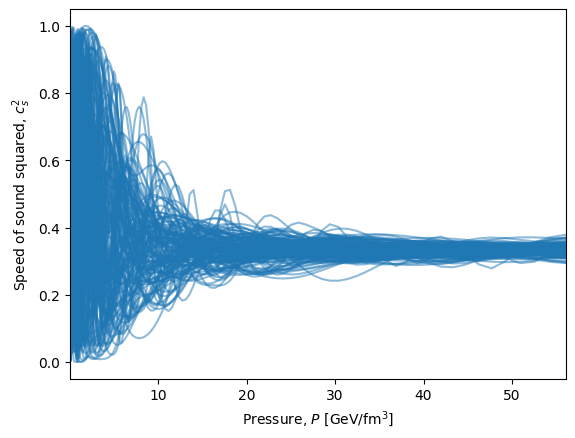

In [5]:
min_pressure = to_GeV_per_cubic_femtometre(1e10)
max_pressure = to_GeV_per_cubic_femtometre(1e17)

# Number of EOS draws
N = 50

fig, ax = plt.subplots()

for variety in ['had', 'hyp', 'qrk']:
    for n in range(N):

        df = pd.read_csv(f'eos-draws-modified/{variety}agn/eos-draw-{n:06}.csv')

        pressure = to_GeV_per_cubic_femtometre(df.pressurec2)
        energy_density = to_GeV_per_cubic_femtometre(df.energy_densityc2)
        number_density = to_nucleons_per_cubic_femtometre(df.baryon_density)

        chemical_potential = (energy_density+pressure)/number_density
        speed_of_sound_squared = np.gradient(pressure, energy_density)

        ax.plot(
            pressure,
            speed_of_sound_squared, 
            alpha=0.5, 
            c='C0'
            )

ax.set_xlim(min_pressure, max_pressure)

ax.set_xlabel(r'Pressure, $P$ [GeV/fm$^3$]')
_ = ax.set_ylabel(r'Speed of sound squared, $c_s^2$')

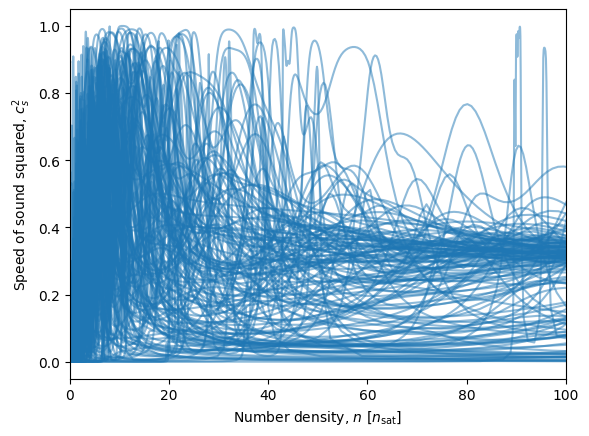

In [8]:
min_pressure = to_GeV_per_cubic_femtometre(1e10)
max_pressure = to_GeV_per_cubic_femtometre(1e17)

# Number of EOS draws
N = 50

fig, ax = plt.subplots()

for variety in ['had', 'hyp', 'qrk']:
    for n in range(N):

        df = pd.read_csv(f'eos-draws-modified/{variety}agn/eos-draw-{n:06}.csv')

        pressure = to_GeV_per_cubic_femtometre(df.pressurec2)
        energy_density = to_GeV_per_cubic_femtometre(df.energy_densityc2)
        number_density = to_nucleons_per_cubic_femtometre(df.baryon_density)

        chemical_potential = (energy_density+pressure)/number_density
        speed_of_sound_squared = np.gradient(pressure, energy_density)

        ax.plot(
            number_density/nsat,
            speed_of_sound_squared, 
            alpha=0.5, 
            c='C0'
            )

ax.set_xlim(0, 100)

ax.set_xlabel(r'Number density, $n$ $[n_{\rm sat}]$')
_ = ax.set_ylabel(r'Speed of sound squared, $c_s^2$')

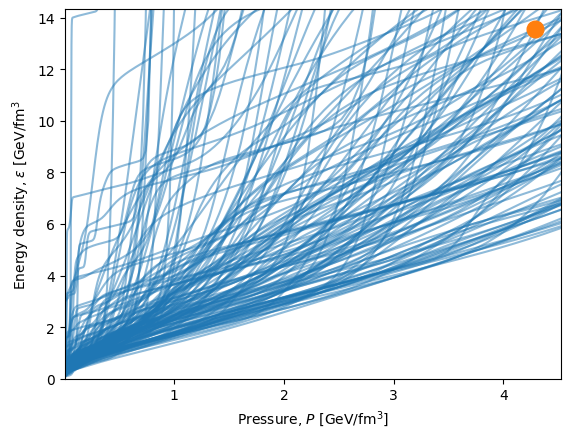

In [12]:
min_pressure = to_GeV_per_cubic_femtometre(1e10)
max_pressure = to_GeV_per_cubic_femtometre(1e17)

# Number of EOS draws
N = 50

fig, ax = plt.subplots()

ax.plot(pH, epsilonH, 'C1', marker='o', markersize=12, zorder=5)

xlim = ax.get_xlim()
ylim = ax.get_ylim()

for variety in ['had', 'hyp', 'qrk']:
    for n in range(N):

        df = pd.read_csv(f'eos-draws-modified/{variety}agn/eos-draw-{n:06}.csv')

        pressure = to_GeV_per_cubic_femtometre(df.pressurec2)
        energy_density = to_GeV_per_cubic_femtometre(df.energy_densityc2)
        number_density = to_nucleons_per_cubic_femtometre(df.baryon_density)

        chemical_potential = (energy_density+pressure)/number_density
        speed_of_sound_squared = np.gradient(pressure, energy_density)

        ax.plot(
            pressure,
            energy_density, 
            alpha=0.5, 
            c='C0'
            )

ax.set_xlim(min_pressure, xlim[1])
ax.set_ylim(0, ylim[1])

ax.set_xlabel(r'Pressure, $P$ [GeV/fm$^3$]')
_ = ax.set_ylabel(r'Energy density, $\epsilon$ [GeV/fm$^3$')

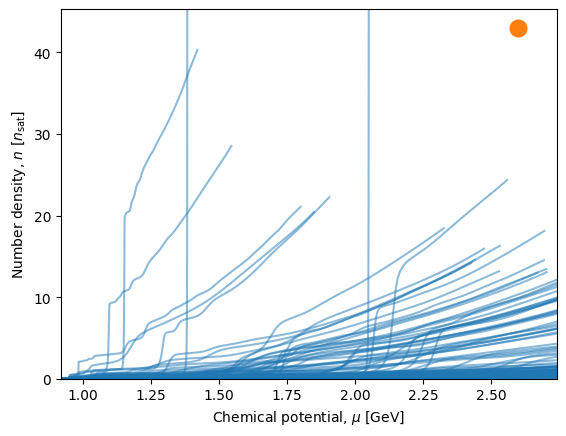

In [14]:
min_pressure = to_GeV_per_cubic_femtometre(1e10)
max_pressure = to_GeV_per_cubic_femtometre(1e17)

# Number of EOS draws
N = 50

fig, ax = plt.subplots()

ax.plot(muH, nH/nsat, 'C1', marker='o', markersize=12, zorder=5)

xlim = ax.get_xlim()
ylim = ax.get_ylim()

min_mu = muH

for variety in ['had', 'hyp', 'qrk']:
    for n in range(N):

        df = pd.read_csv(f'eos-draws-modified/{variety}agn/eos-draw-{n:06}.csv')

        pressure = to_GeV_per_cubic_femtometre(df.pressurec2)
        energy_density = to_GeV_per_cubic_femtometre(df.energy_densityc2)
        number_density = to_nucleons_per_cubic_femtometre(df.baryon_density)

        chemical_potential = (energy_density+pressure)/number_density
        speed_of_sound_squared = np.gradient(pressure, energy_density)

        if min(chemical_potential) < min_mu:
            min_mu = min(chemical_potential)

        ax.plot(
            chemical_potential,
            number_density/nH, 
            alpha=0.5, 
            c='C0'
            )

ax.set_xlim(min_mu, xlim[1])
ax.set_ylim(0, ylim[1])

ax.set_xlabel(r'Chemical potential, $\mu$ [GeV]')
_ = ax.set_ylabel(r'Number density, $n$ $[n_{\rm sat}]$')